In [1]:
#!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px 
from scipy import stats
import seaborn as sns 

# Data preprocessing

In [2]:
#Load csv:we have a dataset of 8 stocks and the stock market index S&P500
data = pd.read_csv('/Users/jingwang/Desktop/Universita/Finance_with_bigdata/Data_PCLab1_Stock.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date') #sort the data by date

In [3]:
# View historical data to confirm it loaded correctly
data

Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [4]:
data.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

# Task #1 : Visualization and 1st step toward the CAPM

In [5]:
# Normalization as a function to normalize the prices based on the intial price
# Since stocks trade at different prices and fluctuate both higher and lower, the measurement must be standardized to show the stock’s movement.
# Converting the daily prices to a percent change variable is a standardized measure of fluctuation.
def Normalization(data):
    temp = data.copy()
    for stock in temp.columns[1:]:
        norm = temp[stock][0]
        temp[stock] = temp[stock]/norm
    return temp

In [6]:
# daily_return as a function to calculate stocks daily returns
# we used another way to find the stocks daily returns instead of using loops
def daily_return(data):
    prices = data.iloc[:,1:].reset_index()
    # with p1 we take the section of the dataframe from second row to the end 
    p1 = prices.iloc[1:,:].reset_index().drop(['level_0','index'],axis=1)
    # with p0 we take the section of the dataframe from the first row to the penultimate row
    p0 = prices.iloc[:-1,:].reset_index().drop(['level_0','index'],axis=1)
    # In this way we can subtract each row (starting from the second row) with the previous one in order to obtain the daily changes of the stock prices
    p1_p0 = p1-p0
    # And so we can obtain the daily returns using the daily changes
    returns = p1_p0/p0
    returns['Date'] = data['Date'][:-1].reset_index().drop(['index'],axis=1)
    date = returns.pop('Date')
    returns.insert(0,'Date',date)
    return returns

In [7]:
d_r = daily_return(data)

In [8]:
d_r

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0    2012-01-12 -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699   
1    2012-01-13  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
2    2012-01-17  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
3    2012-01-18 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
4    2012-01-19 -0.017417 -0.000529  0.002959 -0.012500 -0.018102  0.044316   
...         ...       ...       ...       ...       ...       ...       ...   
2153 2020-08-04  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099   
2154 2020-08-05  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2155 2020-08-06 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198   
2156 2020-08-07  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2157 2020-08-10 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832   

          TSLA      GOOG     sp500  
0    -0.193274 -0.007385 -0.004948  
1     0.167179  0.005744  0.003553  
2     0.007895  0.006889  0.011108  
3    -0.001865  0.010523  0.004939  
4    -0.005979 -0.083775  0.000669  
...        ...       ...       ...  
2153 -0.001332  0.005898  0.006430  
2154  0.003071  0.017976  0.006428  
2155 -0.024752 -0.003740  0.000633  
2156 -0.023501  0.001077  0.002742  
2157 -0.031144 -0.010547 -0.007969  

[2158 rows x 10 columns]

In [9]:
#Scatter plot of each stocks’ daily returns against the market daily returns
def plot_d_return(data):
  market_dr=data.loc[:,'sp500']
  index=data['Date']
  fig,axs=plt.subplots(2,4,figsize=(24,9)) 
  for i,stock in enumerate(data.columns[1:-1]):
    ax=axs[i//4,i%4]
    ax.scatter(data[stock],market_dr,alpha=0.5,s=10)
    
    #sns.jointplot(data[stock],market_dr)
    ax.set_xlabel(stock)
    ax.set_ylabel('S&P500')
  plt.show()
  return


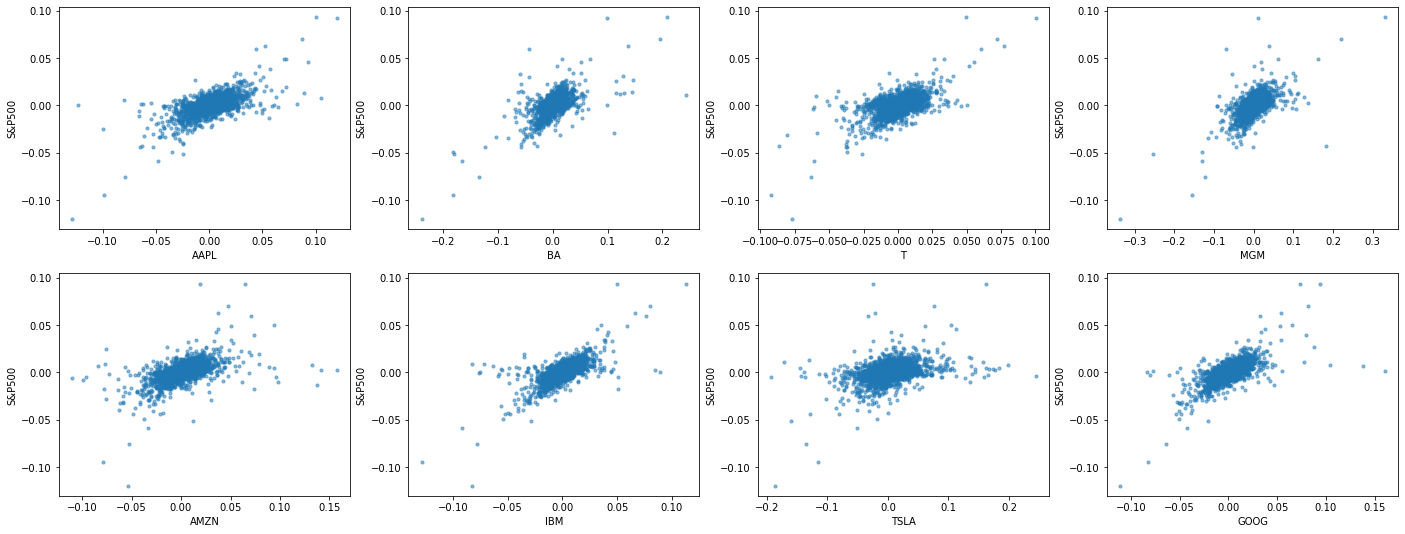

In [10]:
plot_d_return(d_r)

In [11]:
#To have a clear view of possible correlations between each stock's daily returns against the market daily returns,
#plotting the best fit line
def plot_d_return_corr(data):
  market_dr=data.loc[:,'sp500']
  fig,axs=plt.subplots(2,4,figsize=(24,9)) 
  for i,stock in enumerate(data.columns[1:-1]):
    ax=axs[i//4,i%4]
    sns.regplot(ax = ax,y = data[stock],x = market_dr,scatter_kws={'s':10,'alpha':0.5},line_kws={'color':'red'})
    corr=np.corrcoef(data[stock],market_dr)
    corr=np.round(corr[0,1],4)
    ax.text(max(market_dr)-0.04,min(data[stock]),f'ρ = {corr}')
    ax.set_ylabel(stock)
    ax.set_xlabel('S&P500')
  plt.show()
  return


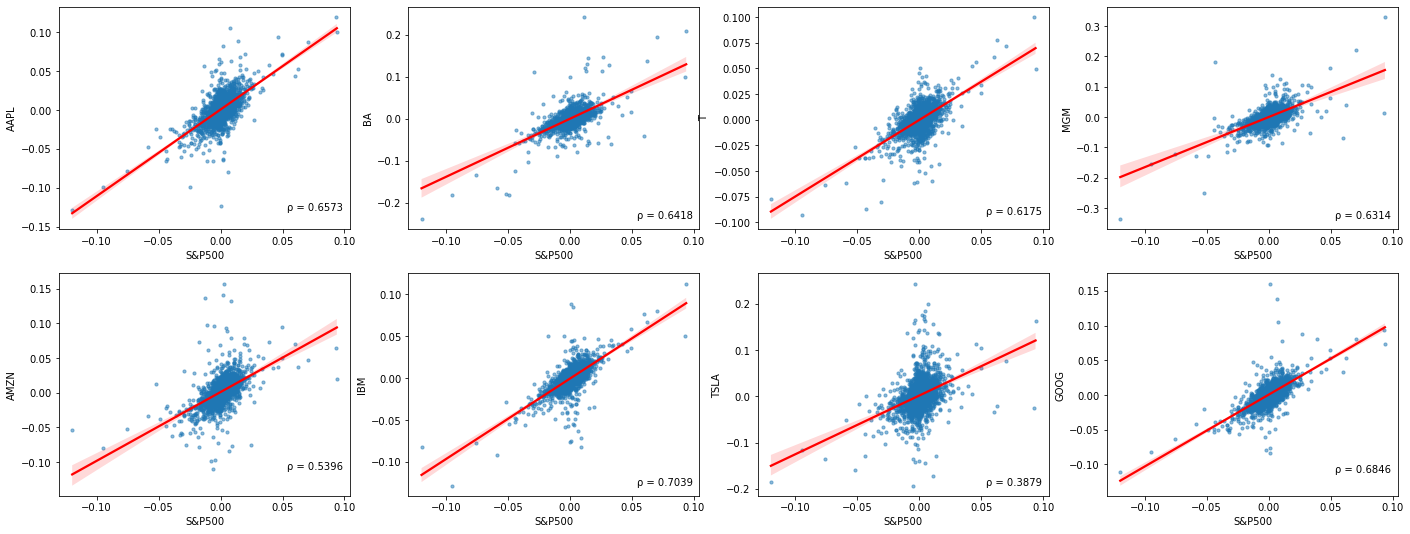

In [12]:
plot_d_return_corr(d_r)

There is a general positive correlation between stocks’ daily returns and the market daily returns. 
An apparent correlation between IBM-sp500 and Google-sp500, it may indicate that these are the firms which stock performance are the most explained by the overall market performance of sp500, but considering that the sp500 already include these firms stocks as consequence in these correlations there is the phenomenon of reverse causality.
The most unrelated stock with the market performance is TSLA, if two pairs of assets offer the same return at the same risk, choosing TSLA that is less correlated decreases the overall risk of the portfolio. By analyzing existing cross correlation between TSLA and sp500 downside, you can compare the effects of market volatilities on TSLA and sp500 and check how they will diversify away market risk if combined in the same portfolio for a given time horizon.

# Task #2 : Compute alpha and beta

### Apply the CAPM : run an OLS regression of stock i returns on market returns, over the whole period. Assume rf = 0. Are the estimates significant ?


In [13]:
# Now we are ready to set-up the linear regression model to calculate the stock beta and alpha
# Calculate the risk premium as r-rf assuming rf=0
rf = 0
d_riskpremium = d_r.copy()
d_riskpremium.iloc[:,1:] = d_riskpremium.iloc[:,1:]-rf # calculate the risk premium r-rf
d_riskpremium

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0    2012-01-12 -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699   
1    2012-01-13  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
2    2012-01-17  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
3    2012-01-18 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
4    2012-01-19 -0.017417 -0.000529  0.002959 -0.012500 -0.018102  0.044316   
...         ...       ...       ...       ...       ...       ...       ...   
2153 2020-08-04  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099   
2154 2020-08-05  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2155 2020-08-06 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198   
2156 2020-08-07  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2157 2020-08-10 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832   

          TSLA      GOOG     sp500  
0    -0.193274 -0.007385 -0.004948  
1     0.167179  0.005744  0.003553  
2     0.007895  0.006889  0.011108  
3    -0.001865  0.010523  0.004939  
4    -0.005979 -0.083775  0.000669  
...        ...       ...       ...  
2153 -0.001332  0.005898  0.006430  
2154  0.003071  0.017976  0.006428  
2155 -0.024752 -0.003740  0.000633  
2156 -0.023501  0.001077  0.002742  
2157 -0.031144 -0.010547 -0.007969  

[2158 rows x 10 columns]

In [14]:
# Estimation of parameters(beta,alpha) of the OLS regression of each stock on market return
# Evaluate the significance of the estimates through pvalue
def parameter_estimation(data):
    stocklist = data.columns[1:-1] # get the names of stocks
    result = []
    for stock in stocklist:
        res = stats.linregress(data['sp500'],data[stock]) # perform the linear regression
        beta = res[0]
        alpha = res[1]
        pvalue = res[3]
        result.append([stock,beta,alpha,pvalue,pvalue<=0.05])
    result = pd.DataFrame(result,columns=['stock','beta','alpha','pvalue','significant']).set_index('stock')
    return result

In [15]:
#Estimates of beta, alpha, pvalue
parameters = parameter_estimation(d_riskpremium) # present the results of the linear regression
parameters=parameters.sort_values(by=['beta'],ascending=False)
parameters  

beta     alpha         pvalue  significant
stock                                                
MGM    1.653568 -0.000169  1.874186e-240         True
BA     1.382867 -0.000023  7.299279e-251         True
TSLA   1.268611  0.001759   1.965135e-78         True
AAPL   1.112891  0.000528  3.521164e-267         True
GOOG   1.034881  0.000334  2.345742e-298         True
AMZN   0.991732  0.001023  2.611172e-163         True
IBM    0.960416 -0.000535  1.185758e-322         True
T      0.744630 -0.000286  4.892378e-227         True

Comment:
All p-values are less than 0.05, proving that the estimates are statistically significant.
Our data favor the hypothesis that there is a non-zero correlation between the stocks returns and the market return. Changes in the market performance (sp500) are associated with changes in the stocks performances at the population level.
In our eight-year beta model, we used around 251*8 data points, corresponding to the daily price for the past 8 years. If we compare our beta with the betas provided from the business entities (Fidelity, Schwab, Yahoo Finance) which are calculated using month-end prices (this means a 3-year beta would only have 36 data points, while a 5-year beta would only have 60 data points) the values are different. Typically in statistics, the greater the number of data points translates to a greater level of confidence.


### Plot the beta and alpha for the 8 stocks. Which stock has the highest (lowest) beta and alpha ? Comment !

In [16]:
#plot betas through plotly 
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='BETA',x=parameters.index, y=parameters['beta']),
])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='BETA', barmode='group')
fig.show()

Comment: Beta measures the volatility of the price of a stock relative to the market which is represented by an index (in our case S&P 500).
We can observe that for the stocks like MGM, BA, TSLA and AAPL there is a beta greater than 1 which means that the security's price tends to be more volatile than the market and generally a stock with a beta greater than one would be in a cyclical industry where sales are up and down and industry that has years where it is hit harder than the market, as well as years where it goes up faster than the market.
Meanwhile for the stocks AAPL, GOOG and AMZN they mirror the volatlity and risk of the sp500 as the index of the market.
T's beta is less than 1 as consequence it has a smoother ride as its moves are more muted than the market's, but it'll usually still go up when the market goes up and down when the market goes down, but generally it will bring a degree of stability to the portfolio that it is a part of. It can, in fact, lower overall portfolio volatility risk.
The steep falls and rises are often viewed as opportunities to time the market. 

In [17]:
#Plot alphas through plotly 
parameters=parameters.sort_values(by=['alpha'],ascending=False)
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='ALPHA', x=parameters.index, y=parameters['alpha']),
])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='ALPHA', barmode='group')
fig.show()

Comment: These are the alpha of the 8 stocks which gauges the performance of these investment against sp500.
TSLA has the highest alpha of 0.00176 means the investment outperformed its benchmark index by 0.176% and IBM has the lowest alpha 0f 0.0005 means the investment underperformed its benchmark index by 0.05%.
Instead like for BA the alpha is around zero so its return matched the benchmark of sp500.
Normally Portfolio managers seek to generate a higher alpha (by choosing for example TSLA) by diversifying their portfolios to balance risk.

### Use the observed returns and the predicted ones to compute and plot the histogram of error terms εi for each stock. Comment !

In [18]:
# Function to estimate expected return
def expected_return(data,parameters):
    result = data.copy()
    stocklist = data.columns[1:-1]
    for stock in stocklist:
        result[stock] = parameters.loc[stock,'beta']*result['sp500']+parameters.loc[stock,'alpha']
    return result.drop(['sp500'],axis=1) # drop sp500 cus it has no error terms

In [19]:
# Function to estimate the error term per day 
def calculate_error_term(data,parameters):
    result = data.copy()
    stocklist = data.columns[1:-1]
    for stock in stocklist:
        result[stock] = result[stock]-expected_return(data,parameters)[stock]
    return result.drop(['sp500'],axis=1) # drop sp500 cus it has no error terms

In [20]:
error_terms=calculate_error_term(d_riskpremium,parameters)
error_terms

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0    2012-01-12  0.001229 -0.005186  0.002310  0.026488  0.018038 -0.002412   
1    2012-01-13  0.007166  0.003689  0.003626 -0.013803  0.013613  0.001811   
2    2012-01-17 -0.002506 -0.017730 -0.005341  0.020985  0.030789 -0.004189   
3    2012-01-18 -0.009194 -0.000145 -0.000424 -0.002499  0.020526 -0.007246   
4    2012-01-19 -0.018690 -0.001432  0.002746 -0.013438 -0.019789  0.044208   
...         ...       ...       ...       ...       ...       ...       ...   
2153 2020-08-04 -0.004059  0.046926 -0.009834 -0.010463  0.013691 -0.008740   
2154 2020-08-05  0.027208 -0.020801 -0.004835  0.093607 -0.001166 -0.000298   
2155 2020-08-06 -0.025727 -0.013512  0.005847  0.030000 -0.019492 -0.009271   
2156 2020-08-07  0.010955  0.051460  0.004240  0.133312 -0.009835  0.015107   
2157 2020-08-10 -0.021399  0.015056  0.006220  0.006418 -0.014557  0.005356   

          TSLA      GOOG  
0    -0.188756 -0.002598  
1     0.160912  0.001734  
2    -0.007956 -0.004941  
3    -0.009889  0.005078  
4    -0.008588 -0.084802  
...        ...       ...  
2153 -0.011248 -0.001090  
2154 -0.006843  0.010991  
2155 -0.027314 -0.004729  
2156 -0.028739 -0.002094  
2157 -0.022793 -0.002634  

[2158 rows x 9 columns]

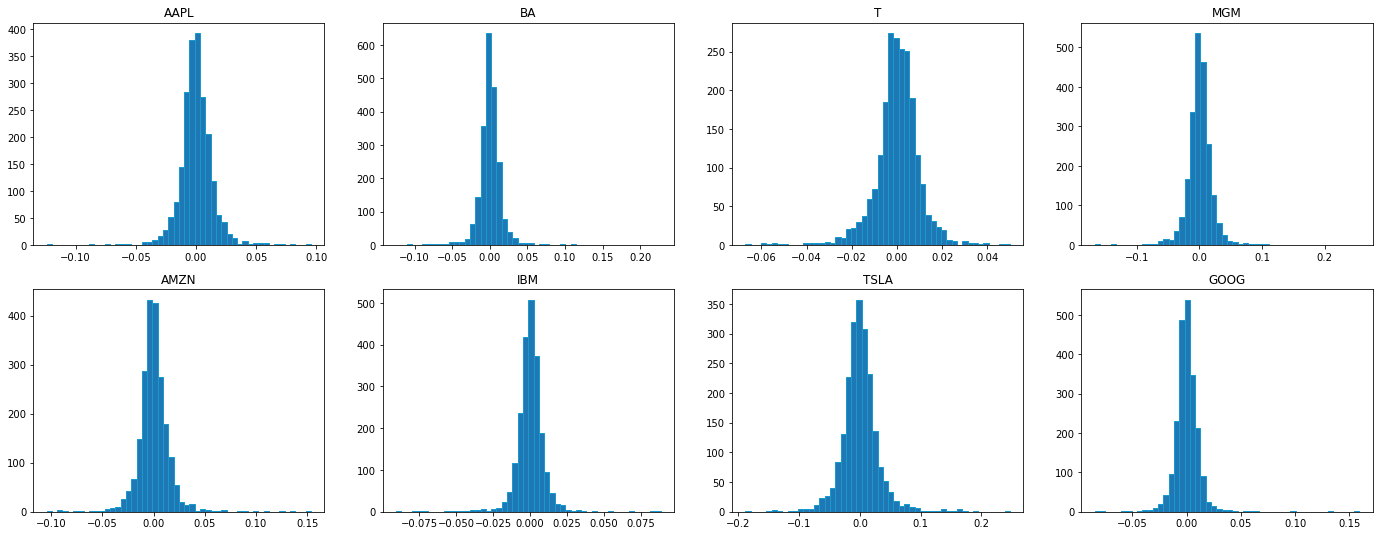

In [21]:
# Plot histogram error terms 
fig,axs=plt.subplots(2,4,figsize=(24,9)) 
for i,stock in enumerate(error_terms.columns[1:]):
    ax=axs[i//4,i%4]
    ax.hist(error_terms[stock],bins=50, edgecolor='#169acf')
    ax.set_title(stock)
    ax.grid
plt.show()

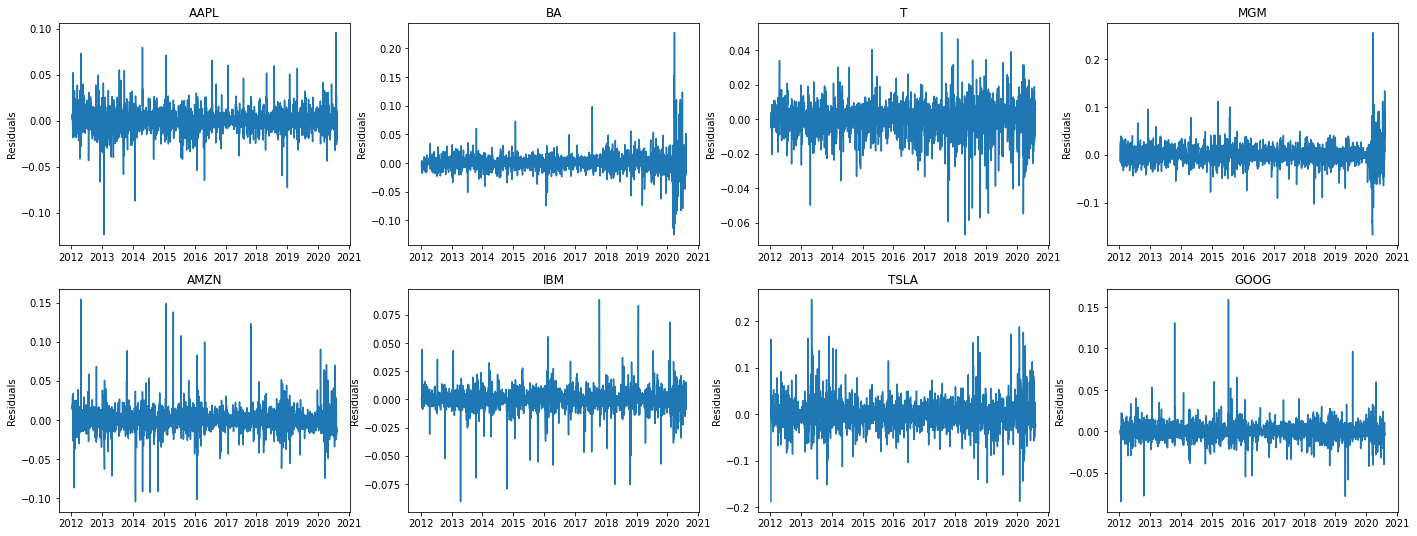

In [22]:
# Plot of error terms of the stocks in 2012-2020
fig,axs=plt.subplots(2,4,figsize=(24,9)) 
for i,stock in enumerate(error_terms.columns[1:]):
    ax=axs[i//4,i%4]
    ax.plot(error_terms['Date'],error_terms[stock])
    ax.set_title(stock)
    ax.set_ylabel('Residuals')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/anaco

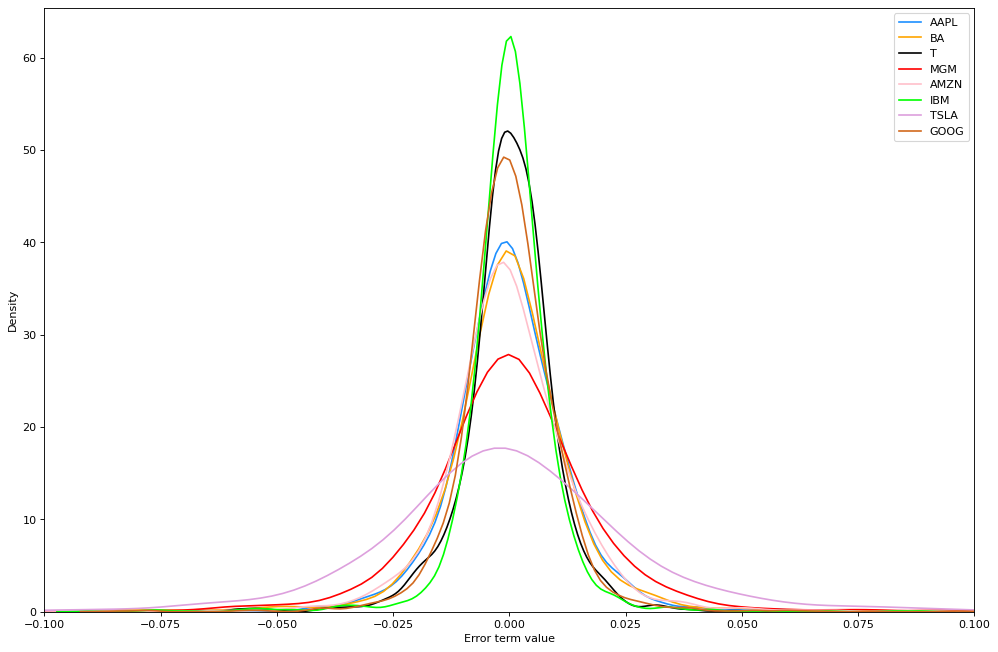

In [23]:
# Plot of the distribution of the error terms, in order to compare the error term of each stock 
kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':1.5})
fig=plt.figure(figsize=(15,10), dpi= 80)
colors=['dodgerblue','orange','black','red','pink','lime','plum','chocolate']

for i,stock in enumerate(error_terms.columns[1:]):
  sns.distplot(error_terms[stock], color=colors[i], label=stock,**kwargs,hist=False)
  plt.xlim(-0.1,0.1)
plt.xlabel('Error term value')
plt.legend()
plt.show()

Comment: The error term indicates the difference between the expected price at a particular time and the price that was actually observed.
As we can see from the graphs (histogram and gaussian distribution) the error term is quasi normal distribuited around 0(No heteroskedasticity, meaning that the level of volatility of the stocks can be predicted).
OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.

In [24]:
# Compute predicted returns
e_r=expected_return(d_riskpremium,parameters)
e_r

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0    2012-01-12 -0.004978 -0.006865 -0.003970 -0.008351 -0.003884 -0.005287   
1    2012-01-13  0.004482  0.004890  0.002360  0.005706  0.004546  0.002878   
2    2012-01-17  0.012890  0.015338  0.007986  0.018199  0.012039  0.010133   
3    2012-01-18  0.006025  0.006807  0.003392  0.007997  0.005920  0.004208   
4    2012-01-19  0.001273  0.000903  0.000213  0.000938  0.001687  0.000108   
...         ...       ...       ...       ...       ...       ...       ...   
2153 2020-08-04  0.007684  0.008869  0.004502  0.010463  0.007399  0.005640   
2154 2020-08-05  0.007682  0.008866  0.004500  0.010460  0.007397  0.005638   
2155 2020-08-06  0.001233  0.000852  0.000186  0.000878  0.001650  0.000073   
2156 2020-08-07  0.003580  0.003769  0.001756  0.004366  0.003742  0.002099   
2157 2020-08-10 -0.008340 -0.011043 -0.006220 -0.013346 -0.006881 -0.008188   

          TSLA      GOOG  
0    -0.004518 -0.004787  
1     0.006266  0.004011  
2     0.015851  0.011829  
3     0.008024  0.005445  
4     0.002608  0.001027  
...        ...       ...  
2153  0.009916  0.006988  
2154  0.009913  0.006986  
2155  0.002562  0.000989  
2156  0.005238  0.003172  
2157 -0.008351 -0.007913  

[2158 rows x 9 columns]

In [25]:
# Here we want to calculate the actual return monthly and expected return monthly to plot them in a 8 year window
# to facilitate the visualization of the results and comparison and to give a higher visibility of the results on the plot
d_r_temp = d_r.copy()
d_r_temp['Date'] = d_r_temp['Date'].dt.strftime('%Y%m')
e_r_temp = e_r.copy()
e_r_temp['Date'] = e_r_temp['Date'].dt.strftime('%Y%m')
actual_return_monthly =d_r_temp.groupby('Date').mean()
expected_return_monthly = e_r_temp.groupby('Date').mean()
actual_return_monthly = actual_return_monthly.reset_index().rename({'index':'Date'},axis=1)
actual_return_monthly['Date'] = pd.to_datetime(actual_return_monthly['Date'],format='%Y%m')

expected_return_monthly = expected_return_monthly.reset_index().rename({'index':'Date'},axis=1)
expected_return_monthly['Date'] = pd.to_datetime(expected_return_monthly['Date'],format='%Y%m')

actual_price_monthly=actual_return_monthly.copy()
expected_price_monthly=expected_return_monthly.copy()

actual_price_monthly.loc[:,'AAPL':'GOOG'] = actual_price_monthly.loc[:,'AAPL':'GOOG']+1
actual_price_monthly.loc[:,'AAPL':'GOOG'] = actual_price_monthly.loc[:,'AAPL':'GOOG'].cumprod()

expected_price_monthly.loc[:,'AAPL':'GOOG'] = expected_price_monthly.loc[:,'AAPL':'GOOG']+1
expected_price_monthly.loc[:,'AAPL':'GOOG'] = expected_price_monthly.loc[:,'AAPL':'GOOG'].cumprod()


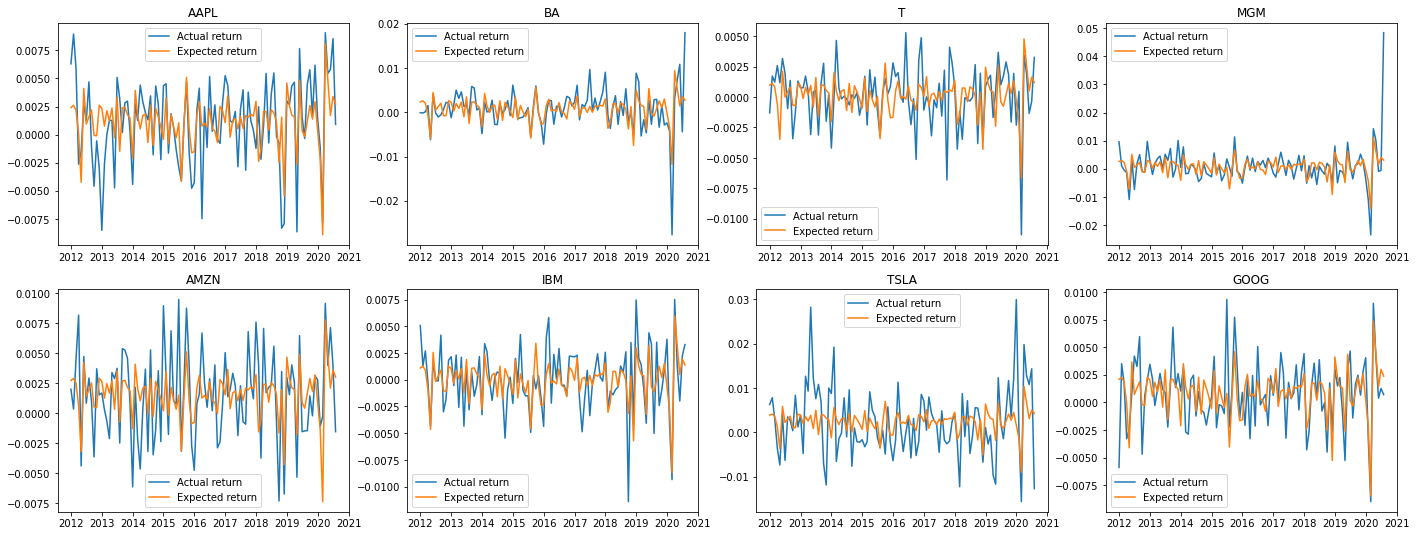

In [26]:
# comparison between the expected return and the actual return of the stocks
fig,axs=plt.subplots(2,4,figsize=(24,9)) 
for i,stock in enumerate(error_terms.columns[1:]):
    ax=axs[i//4,i%4]
    ax.plot(actual_return_monthly['Date'],actual_return_monthly[stock].values,label='Actual return')
    ax.plot(expected_return_monthly['Date'],expected_return_monthly[stock].values,label='Expected return')
    ax.set_title(stock)
    ax.legend()
plt.show()

Comment: they are time serie plots of the comparison between the expected return and the actual return of the stocks in consideration.
We can observe that in 2020 there is an evidence drop in the stock returns and as the main reason it's most likely due to the covid pandemic.

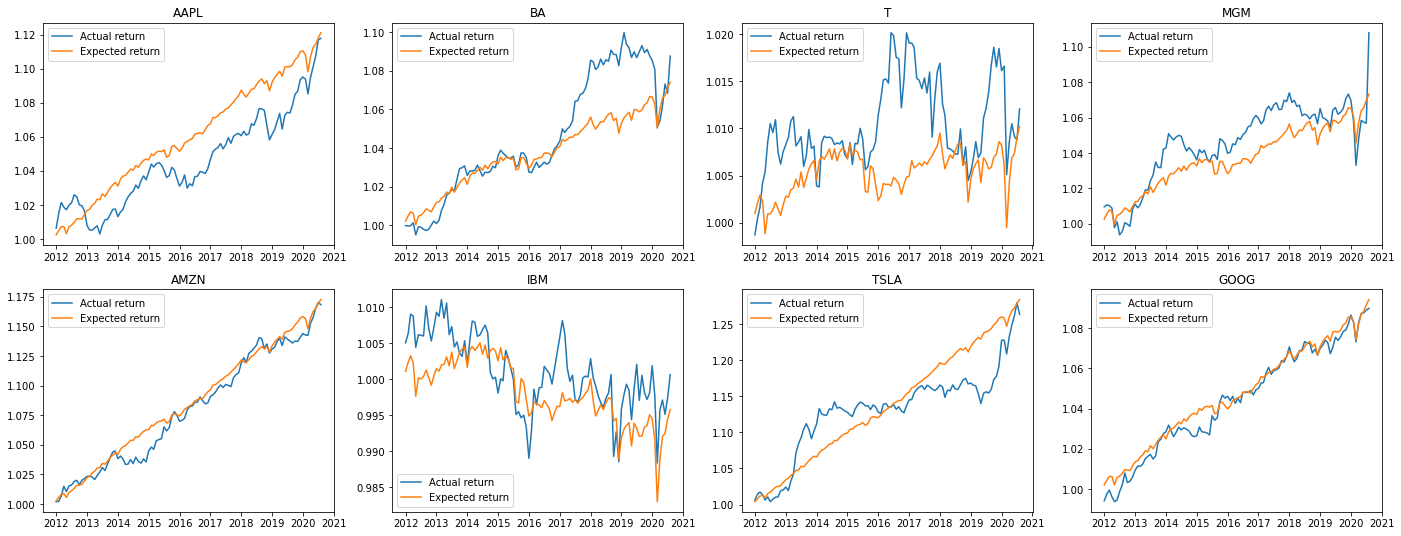

In [27]:
# Plot to show the comparison of the normalized expected prices and the normilized actual price of the stocks 
fig,axs=plt.subplots(2,4,figsize=(24,9)) 
for i,stock in enumerate(error_terms.columns[1:]):
    ax=axs[i//4,i%4]
    ax.plot(actual_price_monthly['Date'],actual_price_monthly[stock].values,label='Actual return')
    ax.plot(expected_price_monthly['Date'],expected_price_monthly[stock].values,label='Expected return')
    ax.set_title(stock)
    ax.legend()
plt.show()

Comment: We can observe that in the most cases there is a similar pattern in the actual and expected prices of the stocks over time.

### Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskier assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above.

In [28]:
# The riskiest 4 stocks
components = list(parameters.sort_values('beta',ascending=False).iloc[:4,:].index)
components

['MGM', 'BA', 'TSLA', 'AAPL']

In [29]:
# The average beta of the 4 riskiest stocks
avg_beta = parameters.loc[components,'beta'].mean()
avg_beta

1.3544844947644183

In [30]:
# The risk premium of the portfolio (equals to the return itself because of 0 rf)
dr_p = avg_beta*d_riskpremium['sp500']
dr_p

0      -0.006702
1       0.004812
2       0.015046
3       0.006689
4       0.000907
          ...   
2153    0.008709
2154    0.008706
2155    0.000857
2156    0.003714
2157   -0.010794
Name: sp500, Length: 2158, dtype: float64

In [31]:
# Calculate the normalized daily price of the portfolio
price_p = (dr_p+1).cumprod() 
price_p = price_p/price_p[0]
price_p

0       1.000000
1       1.004812
2       1.019930
3       1.026753
4       1.027684
          ...   
2153    3.409760
2154    3.439447
2155    3.442396
2156    3.455182
2157    3.417886
Name: sp500, Length: 2158, dtype: float64

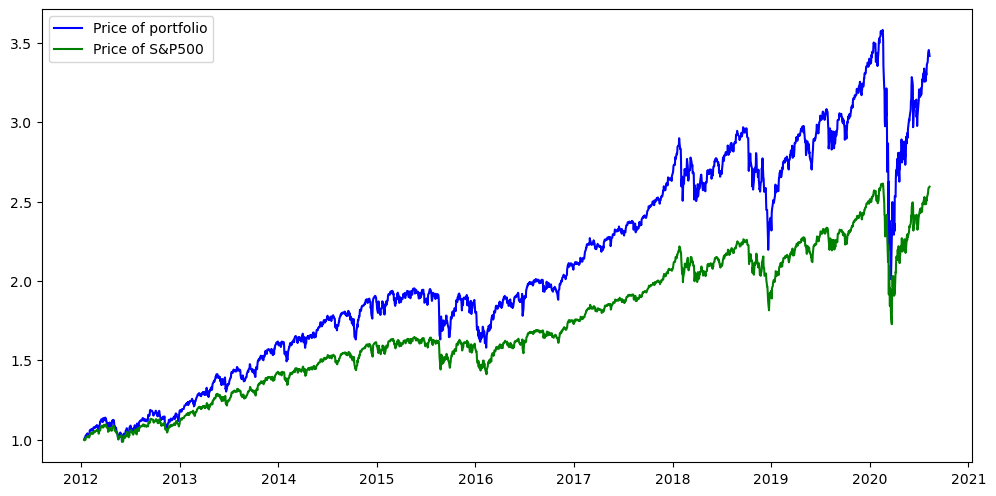

In [32]:
# Plot the price of the portfolio vs price of the market index sp500
fig = plt.figure(figsize=(12,6),dpi=100)
plt.plot(d_r['Date'],price_p,c='b',label='Price of portfolio')
plt.plot(d_r['Date'],Normalization(data)['sp500'][:-1],c='g',label='Price of S&P500')
plt.legend()
plt.show()

Comment: from this plot we can observe that the trend of the prices of the portfolio formed by the 4 riskier assets has a same pattern as the market trend.

# Task #3 : Testing the CAPM theory

### For each year : compute β over 252 business days at the end of each year y − 1 (OLS regression)

In [33]:
# Compute the beta of each stock in each year
beta_yearly = pd.DataFrame(index=parameters.index)
for year in range(2012,2021):
    datai = d_riskpremium[(d_riskpremium['Date']<=str(year+1))&(d_riskpremium['Date']>str(year))] # Filter the data in the looped year
    betai = parameter_estimation(datai)[['beta']].rename({'beta':str(year)},axis=1) # Extract the beta of each stock in the looped year
    beta_yearly = pd.concat([beta_yearly,betai],axis=1)
beta_yearly

2012      2013      2014      2015      2016      2017      2018  \
stock                                                                         
TSLA   1.615081  1.154368  1.911540  1.169560  1.172015  1.381960  1.370124   
AMZN   1.116951  1.273269  1.472650  1.146849  1.076217  1.331930  1.623875   
AAPL   1.280753  0.599856  0.830564  1.133301  1.022376  1.402687  1.253005   
GOOG   0.860889  0.949828  1.283821  1.089269  0.950918  1.261941  1.369755   
BA     1.020130  0.966503  1.029017  1.008192  1.207299  0.994892  1.312838   
MGM    1.749065  1.479735  1.509849  1.478245  1.677154  1.406769  1.359175   
T      0.650171  0.743572  0.563329  0.715434  0.484116  0.727368  0.665239   
IBM    0.861725  0.754768  0.726046  1.016963  0.932617  0.661215  0.968349   

           2019      2020  
stock                      
TSLA   1.326171  1.142885  
AMZN   1.334545  0.604594  
AAPL   1.562317  1.069912  
GOOG   1.296298  0.905165  
BA     0.988694  1.734681  
MGM    1.335829  1.847309  
T      0.572261  0.876021  
IBM    1.075912  1.011323

### At the end or year y, compare the average return of the stock (annualized) to the one predicted by the CAPM model (using β measured at y − 1 but the average market return measured at y).

In [34]:
# The average risk premium of the market in each year
mkt_r_f = d_riskpremium[['Date','sp500']]
mkt_r_f['year'] = mkt_r_f['Date'].dt.year # Extract the year of each date
avg_mkt = mkt_r_f.groupby('year').mean()*252 # group by year and average the risk premium then *252 to transform into yearly data
avg_mkt

/var/folders/fc/kbr1sqh544jg4pc_wy4rzbbm0000gn/T/ipykernel_92481/2135941778.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



sp500
year          
2012  0.134214
2013  0.231265
2014  0.122867
2015 -0.010286
2016  0.123436
2017  0.180290
2018 -0.057183
2019  0.268698
2020  0.126350

In [35]:
# Predict the annual risk premium by CAPM
ry_capm = pd.DataFrame(beta_yearly.loc[:,'2012':'2019'].values*avg_mkt.loc[2013:2020,:].T.values,columns=beta_yearly.columns[1:],index=beta_yearly.index)
ry_capm.sort_index(inplace=True)
ry_capm.index.name=None
ry_capm.columns=[i for i in range(2013,2021)]
ry_capm

2013      2014      2015      2016      2017      2018      2019  \
AAPL  0.296194  0.073702 -0.008543  0.139891  0.184324 -0.080209  0.336680   
AMZN  0.258312  0.156442 -0.015147  0.141563  0.194031 -0.076163  0.436332   
BA    0.235921  0.118751 -0.010584  0.124448  0.217663 -0.056891  0.352757   
GOOG  0.199094  0.116702 -0.013205  0.134455  0.171441 -0.072161  0.368051   
IBM   0.199287  0.092736 -0.007468  0.125530  0.168141 -0.037810  0.260194   
MGM   0.404498  0.181810 -0.015530  0.182469  0.302373 -0.080443  0.365208   
T     0.150362  0.091360 -0.005794  0.088311  0.087281 -0.041593  0.178749   
TSLA  0.373513  0.141833 -0.019662  0.144366  0.211302 -0.079024  0.368150   

          2020  
AAPL  0.197398  
AMZN  0.168619  
BA    0.124921  
GOOG  0.163787  
IBM   0.135941  
MGM   0.168782  
T     0.072305  
TSLA  0.167561

In [36]:
# Calculate the real annual risk premium
stocks_d_riskpremium = d_riskpremium.iloc[:,:-1]
stocks_d_riskpremium['year'] = d_riskpremium['Date'].dt.year
ry_real = ((stocks_d_riskpremium.groupby('year').mean()*252).T).loc[:,2013:2020] # Attention: Here the column names are integer type, not the string
ry_real.sort_index(inplace=True)
ry_real.columns.name=None
ry_real

2013      2014      2015      2016      2017      2018      2019  \
AAPL  0.048311  0.348262 -0.001516  0.124868  0.411615 -0.046206  0.678313   
AMZN  0.472370 -0.201488  0.782041  0.210351  0.479492  0.324460  0.235876   
BA    0.595672 -0.031688  0.101960  0.139908  0.655957  0.136648  0.071071   
GOOG  0.454408 -0.035280  0.391217  0.077894  0.316865  0.021282  0.297267   
IBM  -0.039311 -0.120429 -0.152925  0.226445 -0.068544 -0.261763  0.182796   
MGM   0.701283 -0.073537  0.131580  0.333480  0.159368 -0.218769  0.324147   
T     0.010048 -0.020949  0.026861  0.236125 -0.095100 -0.238119  0.291186   
TSLA  1.672221  0.494219  0.095890  0.044047  0.454560  0.136838  0.447125   

          2020  
AAPL  0.749737  
AMZN  0.880692  
BA   -0.463177  
GOOG  0.224218  
IBM   0.006500  
MGM  -0.059563  
T    -0.322572  
TSLA  2.369164

In [37]:
# compare the average return of the stock to the one predicted by the CAPM model
diff_real_cpm=ry_real-ry_capm
diff_real_cpm

2013      2014      2015      2016      2017      2018      2019  \
AAPL -0.247882  0.274560  0.007027 -0.015023  0.227291  0.034003  0.341633   
AMZN  0.214057 -0.357931  0.797188  0.068788  0.285461  0.400623 -0.200457   
BA    0.359751 -0.150439  0.112545  0.015461  0.438294  0.193539 -0.281686   
GOOG  0.255314 -0.151982  0.404422 -0.056561  0.145424  0.093443 -0.070783   
IBM  -0.238598 -0.213165 -0.145457  0.100915 -0.236685 -0.223953 -0.077398   
MGM   0.296785 -0.255347  0.147110  0.151011 -0.143006 -0.138326 -0.041060   
T    -0.140314 -0.112309  0.032655  0.147815 -0.182381 -0.196526  0.112437   
TSLA  1.298709  0.352386  0.115552 -0.100320  0.243258  0.215862  0.078975   

          2020  
AAPL  0.552338  
AMZN  0.712073  
BA   -0.588098  
GOOG  0.060432  
IBM  -0.129441  
MGM  -0.228345  
T    -0.394877  
TSLA  2.201603

In [38]:
# Transpose the dataframe for the plotting 
ry_real=ry_real.T
ry_capm=ry_capm.T
beta_yearly=beta_yearly.T
ry_real

AAPL      AMZN        BA      GOOG       IBM       MGM         T  \
2013  0.048311  0.472370  0.595672  0.454408 -0.039311  0.701283  0.010048   
2014  0.348262 -0.201488 -0.031688 -0.035280 -0.120429 -0.073537 -0.020949   
2015 -0.001516  0.782041  0.101960  0.391217 -0.152925  0.131580  0.026861   
2016  0.124868  0.210351  0.139908  0.077894  0.226445  0.333480  0.236125   
2017  0.411615  0.479492  0.655957  0.316865 -0.068544  0.159368 -0.095100   
2018 -0.046206  0.324460  0.136648  0.021282 -0.261763 -0.218769 -0.238119   
2019  0.678313  0.235876  0.071071  0.297267  0.182796  0.324147  0.291186   
2020  0.749737  0.880692 -0.463177  0.224218  0.006500 -0.059563 -0.322572   

          TSLA  
2013  1.672221  
2014  0.494219  
2015  0.095890  
2016  0.044047  
2017  0.454560  
2018  0.136838  
2019  0.447125  
2020  2.369164

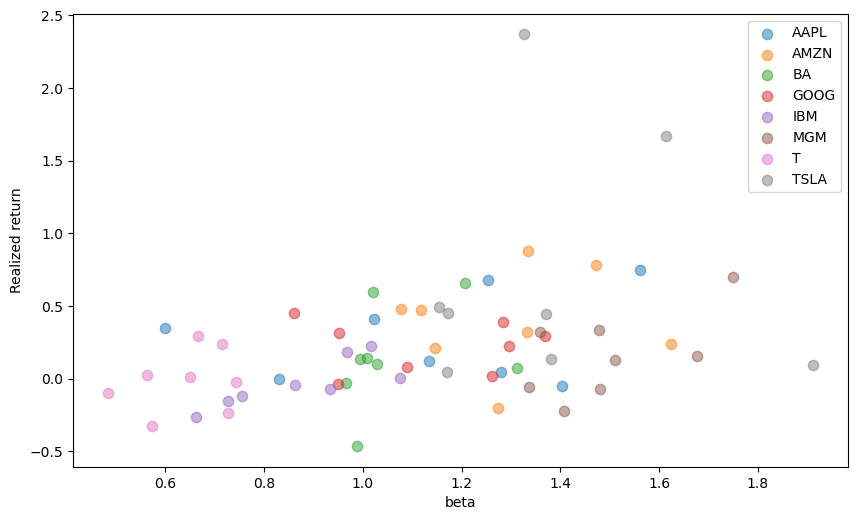

In [39]:
#Scatter plot of the realized returns against the beta
fig = plt.figure(figsize=(10,6),dpi=100)
for stock in ry_real.columns[:]:
    plt.scatter(beta_yearly.loc[:'2019',stock],ry_real[stock],alpha=0.5,s=55,label=stock) 
    plt.xlabel('beta')
    plt.ylabel('Realized return')
    plt.legend()
  

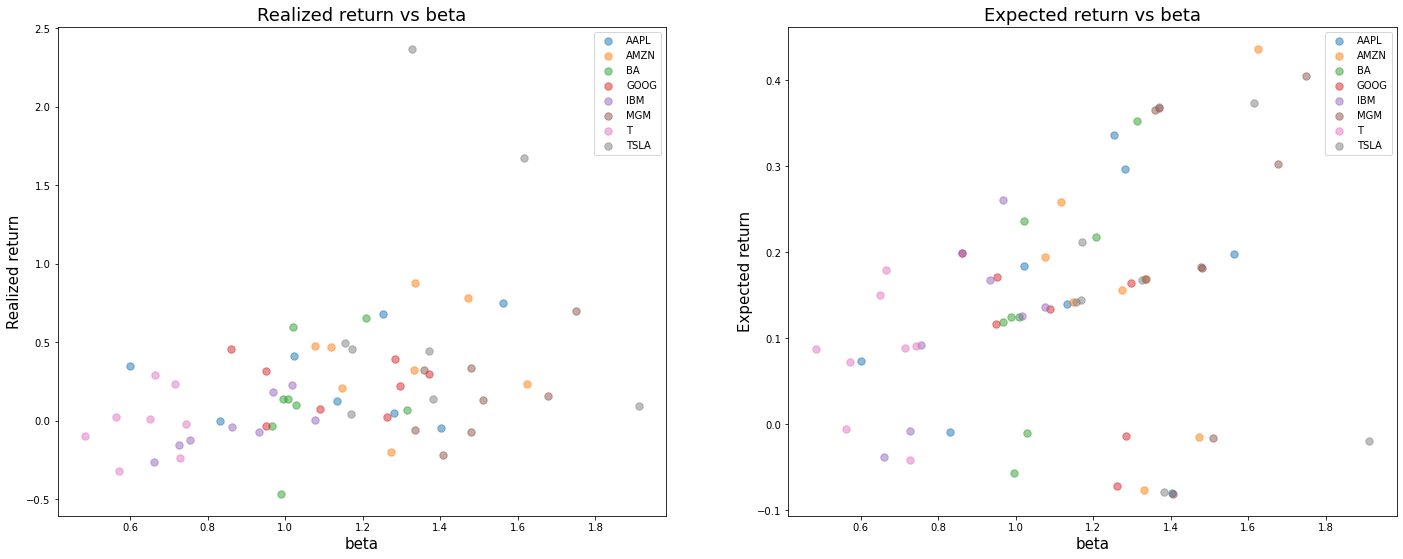

In [40]:
# scatter plot of the realized returns against the beta 
# scatter plot of the expected returns against the beta
fig,axs=plt.subplots(1,2,figsize=(24,9)) 
ax=axs[0]
for stock in ry_real.columns[:]:
    ax.scatter(beta_yearly.loc[:'2019',stock],ry_real[stock],alpha=0.5,s=55,label=stock) 
    ax.set_xlabel('beta',fontsize=15)
    ax.set_ylabel('Realized return',fontsize=15)
    ax.legend()
    ax.set_title('Realized return vs beta',fontsize=18)
ax=axs[1]
for stock in ry_real.columns[:]:
    ax.scatter(beta_yearly.loc[:'2019',stock],ry_capm[stock],alpha=0.5,s=55,label=stock) 
    ax.set_xlabel('beta',fontsize=15)
    ax.set_ylabel('Expected return',fontsize=15)
    ax.legend()
    ax.set_title('Expected return vs beta',fontsize=18)
  

Comment: we can observe that in the first scatter plot where we have the correlation between the beta and the realized return there is a very slightly positive correlation between the two variables and it means that beta might give some hint on the return of a stock (higher beta, higher risk and higher return) but not so obvious, generally there is a significant positive relationship between beta and returns in periods when the world market excess returns are positive and a significant negative relationship in periods when the world market excess returns are negative.
We can see a strong correlation in the plot on the right between the expected return and  beta(which should be like this), where beta has a positive trend for the positive expected returns and a negative trend as the expected returns decrease below 0.

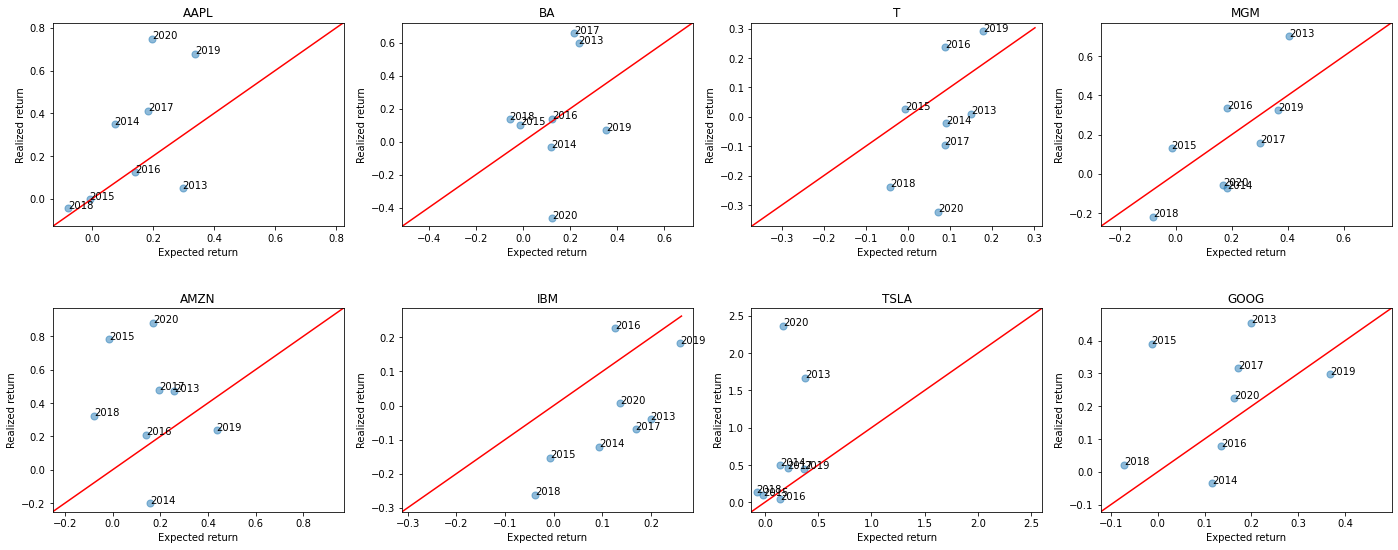

In [41]:
#plot expected return vs realized return yearly 
fig,axs=plt.subplots(2,4,figsize=(24,9))
fig.subplots_adjust(hspace=0.4) 
for i,stock in enumerate(data.columns[1:-1]):

  ax=axs[i//4,i%4]
  ax.scatter(ry_capm[stock],ry_real[stock],alpha=0.5,s=50)
  xmin = min(ry_capm[stock].min(),ry_real[stock].min())
  xmax = max(ry_capm[stock].max(),ry_real[stock].max())
  ax.set_xlim(xmin-0.05,1.1*xmax)
  ax.set_ylim(xmin-0.05,1.1*xmax)
  xaxis = np.arange(xmin-0.05,1.2*xmax,(xmax-xmin)/10)
  yaxis = np.arange(xmin-0.05,1.2*xmax,(xmax-xmin)/10)
  ax.plot(xaxis,yaxis,c='red')
  for i,cords in enumerate(zip(ry_capm[stock],ry_real[stock])):
    ax.text(cords[0],cords[1],str(i+2013))
  ax.set_xlabel('Expected return')
  ax.set_ylabel('Realized return')
  ax.set_title(stock)
  

### Alternatively, you may use a β computed over longer (shorter) periods of time.

In [42]:
# Redo the above steps in monthly scale
d_riskpremium_temp = d_riskpremium.copy()
d_riskpremium_temp['Date'] = d_riskpremium_temp['Date'].dt.strftime('%Y%m')
d_riskpremium_temp

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0     201201 -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699   
1     201201  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
2     201201  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
3     201201 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
4     201201 -0.017417 -0.000529  0.002959 -0.012500 -0.018102  0.044316   
...      ...       ...       ...       ...       ...       ...       ...   
2153  202008  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099   
2154  202008  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2155  202008 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198   
2156  202008  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2157  202008 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832   

          TSLA      GOOG     sp500  
0    -0.193274 -0.007385 -0.004948  
1     0.167179  0.005744  0.003553  
2     0.007895  0.006889  0.011108  
3    -0.001865  0.010523  0.004939  
4    -0.005979 -0.083775  0.000669  
...        ...       ...       ...  
2153 -0.001332  0.005898  0.006430  
2154  0.003071  0.017976  0.006428  
2155 -0.024752 -0.003740  0.000633  
2156 -0.023501  0.001077  0.002742  
2157 -0.031144 -0.010547 -0.007969  

[2158 rows x 10 columns]

In [43]:
# The monthly beta
beta_monthly = pd.DataFrame(index=parameters.index)
d_riskpremium_temp = d_riskpremium.copy()
d_riskpremium_temp['Date'] = d_riskpremium_temp['Date'].dt.strftime('%Y%m') # Extract the year and months from the date
months = d_riskpremium_temp['Date'].drop_duplicates().tolist() # Get the list of all the involved months
for m in months:
    datai = d_riskpremium_temp[d_riskpremium_temp['Date']==m] # Filter the data in the looped year
    betai = parameter_estimation(datai)[['beta']].rename({'beta':m},axis=1) # Extract the beta of each stock in the looped year
    beta_monthly = pd.concat([beta_monthly,betai],axis=1)
beta_monthly

201201    201202    201203    201204    201205    201206    201207  \
stock                                                                         
TSLA   4.510455  1.937987  1.555837  1.585204  3.181887  1.271180  0.748794   
AMZN  -0.780768  1.706588  0.484411  1.369175  1.268968  0.748985  1.761277   
AAPL   1.592496  0.696807  1.026229  1.628169  1.685332  0.824467  0.511734   
GOOG   0.275413  0.921379  0.654047  1.062763  0.869089  0.952849  0.693761   
BA     1.052345  0.639817  1.051172  1.621988  1.379716  0.977824  1.031623   
MGM    1.652503  1.990337  2.715301  1.399910  2.403983  1.445499  1.602517   
T      1.007858  0.475857  0.475202  0.812924  0.277161  0.436293  0.989405   
IBM    0.024433  0.644032  0.626049  1.060792  0.646142  0.949976  1.087920   

         201208    201209    201210  ...    201911    201912    202001  \
stock                                ...                                 
TSLA   1.512655  2.806574  1.095883  ... -0.012655  1.981562  1.970611   
AMZN   1.092160  1.380196  0.937482  ...  1.215404  1.424014 -0.520254   
AAPL   0.649278  1.405662  1.352032  ...  1.593462  1.474387  1.975923   
GOOG   0.777857  0.805480  0.919603  ...  1.699676  1.176658  1.409395   
BA     1.368108  0.624752  0.445319  ...  0.883854  0.452999  0.457097   
MGM    2.691169  2.175663  1.301338  ...  0.688567  1.068352  1.650810   
T      0.282436  0.342287  0.814074  ...  0.747063  0.373571 -0.078613   
IBM    1.201754  0.658560  0.633553  ...  0.904581  1.040673 -0.081637   

         202002    202003    202004    202005    202006    202007    202008  
stock                                                                        
TSLA   2.272766  0.959481  1.046452  0.646399  1.059127  4.084827  2.333532  
AMZN   0.963386  0.589184  0.565198  0.301732  0.546988  1.626612  2.564706  
AAPL   1.631772  1.043317  0.925700  0.631340  0.846878  1.826734  3.635596  
GOOG   0.902546  0.870519  1.058035  0.675247  0.869942  1.125013  1.437786  
BA     1.310152  1.628413  1.622879  2.385601  3.075358  1.944450  1.689458  
MGM    1.180233  1.656106  2.484678  3.721228  2.340180  0.898889  4.423681  
T      0.844782  0.849570  0.963785  1.438961  1.012330  0.518075 -0.050597  
IBM    0.959620  0.971543  1.119049  1.208960  1.345330  1.065001  0.583081  

[8 rows x 104 columns]

In [44]:
# The monthly market risk premium
mkt_r_f_m = d_riskpremium[['Date','sp500']]
mkt_r_f_m['Date'] = mkt_r_f_m['Date'].dt.strftime('%Y%m')
avg_mkt_m = mkt_r_f_m.groupby('Date').mean()*22 # group by months and average the risk premium then *22 to transform into monthly data
avg_mkt_m

/var/folders/fc/kbr1sqh544jg4pc_wy4rzbbm0000gn/T/ipykernel_92481/3936328344.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



sp500
Date            
201201  0.037264
201202  0.041092
201203  0.032774
201204 -0.009414
201205 -0.094250
...          ...
202004  0.149337
202005  0.085941
202006  0.023166
202007  0.056597
202008  0.043543

[104 rows x 1 columns]

In [45]:
# Predict the monthly risk premium by CAPM
rm_capm = pd.DataFrame(beta_monthly.loc[:,'201201':'202007'].values*avg_mkt_m.loc['201202':'202008',:].T.values,columns=beta_monthly.columns[1:],index=beta_monthly.index)
rm_capm.index.name=None
rm_capm.columns = [int(c) for c in rm_capm.columns]
rm_capm

201202    201203    201204    201205    201206    201207    201208  \
TSLA  0.185342  0.063515 -0.014646 -0.149405  0.225381  0.010563  0.015519   
AMZN -0.032083  0.055931 -0.004560 -0.129044  0.089884  0.006224  0.036502   
AAPL  0.065438  0.022837 -0.009661 -0.153454  0.119376  0.006851  0.010606   
GOOG  0.011317  0.030197 -0.006157 -0.100165  0.061560  0.007918  0.014378   
BA    0.043242  0.020969 -0.009896 -0.152872  0.097729  0.008125  0.021380   
MGM   0.067904  0.065231 -0.025561 -0.131941  0.170280  0.012011  0.033212   
T     0.041414  0.015596 -0.004473 -0.076618  0.019632  0.003625  0.020505   
IBM   0.001004  0.021107 -0.005893 -0.099979  0.045768  0.007894  0.022547   

        201209    201210    201211  ...    201911    201912    202001  \
TSLA  0.049537 -0.033071 -0.013634  ... -0.001829 -0.000603 -0.004549   
AMZN  0.035767 -0.016263 -0.011663  ...  0.016016  0.057870 -0.003269   
AAPL  0.021263 -0.016564 -0.016821  ...  0.022250  0.075870 -0.003385   
GOOG  0.025474 -0.009491 -0.011441  ...  0.020120  0.080928 -0.002701   
BA    0.044804 -0.007362 -0.005540  ...  0.011514  0.042083 -0.001040   
MGM   0.088132 -0.025637 -0.016190  ...  0.021484  0.032785 -0.002453   
T     0.009249 -0.004033 -0.010128  ...  0.007269  0.035570 -0.000858   
IBM   0.039356 -0.007760 -0.007882  ...  0.014995  0.043070 -0.002389   

        202002    202003    202004    202005    202006    202007    202008  
TSLA -0.106412 -0.424498  0.143286  0.089933  0.014974  0.059943  0.177867  
AMZN  0.028093 -0.179938  0.087987  0.048574  0.006990  0.030958  0.070828  
AAPL -0.106699 -0.304776  0.155806  0.079556  0.014625  0.047931  0.079542  
GOOG -0.076107 -0.168574  0.130001  0.090929  0.015642  0.049236  0.048987  
BA   -0.024683 -0.244705  0.243183  0.139472  0.055264  0.174056  0.084668  
MGM  -0.089143 -0.220439  0.247319  0.213537  0.086204  0.132447  0.039141  
T     0.004245 -0.157785  0.126872  0.082829  0.033334  0.057295  0.022559  
IBM   0.004408 -0.179234  0.145088  0.096173  0.028006  0.076142  0.046374  

[8 rows x 103 columns]

In [46]:
# Calculate the real monthly risk premium
stocks_mr_rf = d_riskpremium.iloc[:,:-1]
stocks_mr_rf['Date'] = stocks_mr_rf['Date'].dt.strftime('%Y%m')
rm_real = ((stocks_mr_rf.groupby('Date').mean()*22).T).loc[:,'201202':'202008']
rm_real.columns.name=None
rm_real

201202    201203    201204    201205    201206    201207    201208  \
AAPL  0.196949  0.130812 -0.057732 -0.033128  0.058833  0.027425  0.103266   
BA   -0.003754  0.002171  0.033017 -0.136092  0.091148 -0.003834 -0.024109   
T     0.037862  0.026780  0.056703  0.025557  0.069622  0.042743 -0.021088   
MGM   0.022931 -0.009163 -0.030669 -0.239916  0.072270 -0.161629  0.040424   
AMZN  0.007192  0.098344  0.179317 -0.097195  0.103523  0.017969  0.063986   
IBM   0.028051  0.059213 -0.006015 -0.094621  0.038283 -0.001363 -0.002525   
TSLA  0.172036  0.068809 -0.078721 -0.162163  0.091524 -0.139353  0.076816   
GOOG  0.077044  0.039725 -0.072280 -0.053953  0.019243  0.092349  0.071632   

        201209    201210    201211  ...    201911    201912    202001  \
AAPL -0.024783 -0.101177 -0.012033  ...  0.036028  0.136096  0.031756   
BA   -0.013011  0.012408  0.048838  ...  0.034343 -0.063693 -0.053209   
T     0.029881 -0.075373 -0.027290  ... -0.045382  0.042668 -0.050906   
MGM   0.111014 -0.018512 -0.026446  ...  0.114786  0.054764 -0.074690   
AMZN  0.021185 -0.080680  0.081098  ... -0.005307  0.068079  0.060679   
IBM   0.091826 -0.066163 -0.040533  ... -0.020776  0.020113  0.083453   
TSLA  0.058043  0.007974  0.184299  ...  0.078076  0.268715  0.659650   
GOOG  0.131170 -0.102921  0.013492  ...  0.014651  0.061894  0.089111   

        202002    202003    202004    202005    202006    202007    202008  
AAPL -0.026119 -0.173470  0.199709  0.119771  0.127915  0.187990  0.020139  
BA   -0.093346 -0.608738  0.069243  0.159114  0.237836 -0.097348  0.394890  
T     0.010291 -0.248915  0.075792  0.042141 -0.029422 -0.007991  0.071604  
MGM  -0.242353 -0.515633  0.313749  0.222115 -0.019925 -0.011618  1.064079  
AMZN -0.024562 -0.006514  0.200933  0.087098  0.156366  0.086561 -0.034446  
IBM  -0.093275 -0.205610  0.165049  0.030430 -0.043839  0.049357  0.072326  
TSLA  0.004177 -0.344397  0.436053  0.282273  0.237389  0.315622 -0.279807  
GOOG -0.072743 -0.197485  0.197391  0.090441  0.008509  0.027999  0.015527  

[8 rows x 103 columns]

In [47]:
#Transpose dataframes for plotting
rm_real=rm_real.T
rm_capm=rm_capm.T
beta_monthly=beta_monthly.T

In [48]:
beta_monthly

TSLA      AMZN      AAPL      GOOG        BA       MGM         T  \
201201  4.510455 -0.780768  1.592496  0.275413  1.052345  1.652503  1.007858   
201202  1.937987  1.706588  0.696807  0.921379  0.639817  1.990337  0.475857   
201203  1.555837  0.484411  1.026229  0.654047  1.051172  2.715301  0.475202   
201204  1.585204  1.369175  1.628169  1.062763  1.621988  1.399910  0.812924   
201205  3.181887  1.268968  1.685332  0.869089  1.379716  2.403983  0.277161   
...          ...       ...       ...       ...       ...       ...       ...   
202004  1.046452  0.565198  0.925700  1.058035  1.622879  2.484678  0.963785   
202005  0.646399  0.301732  0.631340  0.675247  2.385601  3.721228  1.438961   
202006  1.059127  0.546988  0.846878  0.869942  3.075358  2.340180  1.012330   
202007  4.084827  1.626612  1.826734  1.125013  1.944450  0.898889  0.518075   
202008  2.333532  2.564706  3.635596  1.437786  1.689458  4.423681 -0.050597   

             IBM  
201201  0.024433  
201202  0.644032  
201203  0.626049  
201204  1.060792  
201205  0.646142  
...          ...  
202004  1.119049  
202005  1.208960  
202006  1.345330  
202007  1.065001  
202008  0.583081  

[104 rows x 8 columns]

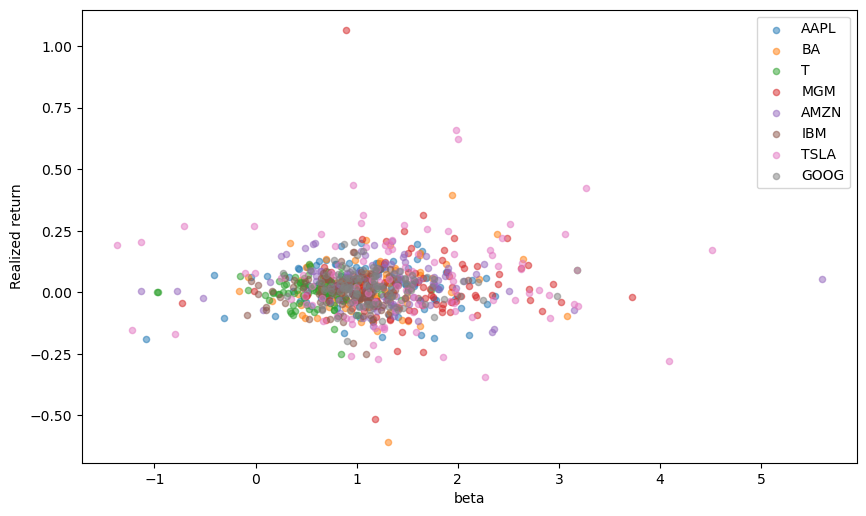

In [49]:
#scatter plot of the realized returns against the beta
fig = plt.figure(figsize=(10,6),dpi=100)
for stock in rm_real.columns[:]:
    plt.scatter(beta_monthly.loc[:'202007',stock],rm_real[stock],alpha=0.5,s=20,label=stock) 
    plt.xlabel('beta')
    plt.ylabel('Realized return')
    plt.legend()
  

Comment: These results show that the CAPM calculation is a misleading determination of potential rate of return, despite widespread use. The underlying assumptions of the CAPM are unrealistic in nature, and have little relation to the actual investing world.
Investors have other alternatives to evaluate the potential return on their securities portfolio.
On e of the reason is that individual investors are unable to borrow (or lend) at the same rate as the government, which is often forgotten under the model.
Also CAPM uses the past to make determinations about the future. By taking the Beta value of a certain security, we're evaluating the past volatility of that certain security to determine future volatility, when it's a well known fact that securities are susceptible to extreme deviations from their historic behavior.
To conclude, we can observe that in the scatter plot of the year return and beta there is a more evident correlation between the return and beta indicator instead in the montly framework (above scatter plot) this correlation seems more weak or even uncorrelated. The reason of this may be that in the year framework there is less problem of idiosincratic errors and then beta can capture more the effect of high risk-high return.

# Optional Task : Obtain data from the web

In [50]:
tickers = ['MMM','ABT','ABBV','ABMD','ACN','ATVI','ADBE','AMD','AAP','AES','AFL','A','APD','AKAM','ALK','ALB','ARE','ALGN','ALLE','LNT','ALL','GOOGL','GOOG','MO','AMZN','AMCR','AEE','AAL','AEP','AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','ADI','ANSS','ANTM','AON','AOS','APA','AAPL','AMAT','APTV','ADM','ANET','AJG','AIZ','T','ATO','ADSK','ADP','AZO','AVB','AVY','BKR','BLL','BAC','BBWI','BAX','BDX','BRK.B','BBY','BIO','BIIB','BLK','BK','BA','BKNG','BWA','BXP','BSX','BMY','AVGO','BR','BF.B','CHRW','COG','CDNS','CZR','CPB','COF','CAH','KMX','CCL','CARR','CTLT','CAT','CBOE','CBRE','CDW','CE','CNC','CNP','CERN','CF','CRL','SCHW','CHTR','CVX','CMG','CB','CHD','CI','CINF','CTAS','CSCO','C','CEGVV','CFG','CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','COP','ED','STZ','COO','CPRT','GLW','CTVA','COST','CCI','CSX','CMI','CVS','DHI','DHR','DRI','DVA','DE','DAL','XRAY','DVN','DXCM','FANG','DLR','DFS','DISCA','DISCK','DISH','DG','DLTR','D','DPZ','DOV','DOW','DTE','DUK','DRE','DD','DXC','EMN','ETN','EBAY','ECL','EIX','EW','EA','EMR','ENPH','ETR','EOG','EFX','EQIX','EQR','ESS','EL','ETSY','EVRG','ES','RE','EXC','EXPE','EXPD','EXR','XOM','FFIV','FB','FAST','FRT','FDX','FIS','FITB','FE','FRC','FISV','FLT','FMC','F','FTNT','FTV','FBHS','FOXA','FOX','BEN','FCX','GRMN','IT','GNRC','GD','GE','GIS','GM','GPC','GILD','GL','GPN','GS','GWW','HAL','HBI','HIG','HAS','HCA','PEAK','HSIC','HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HWM','HPQ','HUM','HBAN','HII','IEX','IDXX','INFO','ITW','ILMN','INCY','IR','INTC','ICE','IBM','IP','IPG','IFF','INTU','ISRG','IVZ','IPGP','IQV','IRM','JKHY','J','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY','KEYS','KMB','KIM','KMI','KLAC','KHC','KR','LHX','LH','LRCX','LW','LVS','LEG','LDOS','LEN','LLY','LNC','LIN','LYV','LKQ','LMT','L','LOW','LUMN','LYB','MTB','MRO','MPC','MKTX','MAR','MMC','MLM','MAS','MA','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','MCHP','MU','MSFT','MAA','MRNA','MHK','TAP','MDLZ','MPWR','MNST','MCO','MS','MOS','MSI','MSCI','NDAQ','NTAP','NFLX','NWL','NEM','NWSA','NWS','NEE','NLSN','NKE','NI','NSC','NTRS','NOC','NLOK','NCLH','NOV','NRG','NUE','NVDA','NVR','NXPI','onsemi','ORLY','OXY','ODFL','OMC','OKE','ORCL','OGN','OTIS','PCAR','PKG','PH','PAYX','PAYC','PYPL','PENN','PNR','PBCT','PEP','PKI','PRGO','PFE','PM','PSX','PNW','PXD','PNC','POOL','PPG','PPL','PFG','PG','PGR','PLD','PRU','PTC','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RL','RJF','RTX','O','REG','REGN','RF','RSG','RMD','RHI','ROK','ROL','ROP','ROST','RCL','SPGI','CRM','SBAC','SLB','STX','SEE','SRE','NOW','SHW','SPG','SWKS','SNA','SO','LUV','SWK','SBUX','STT','STE','SYK','SIVB','SYF','SNPS','SYY','TECH','TMUS','TROW','TTWO','TPR','TGT','TEL','TDY','TFX','TER','TSLA','TXN','TXT','TMO','TJX','TSCO','TT','TDG','TRV','TRMB','TFC','TWTR','TYL','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI','UHS','UNM','VLO','VTR','VRSN','VRSK','VZ','VRTX','VFC','VIAC','VTRS','V','VNO','VMC','WRB','WAB','WMT','WBA','DIS','WM','WAT','WEC','WFC','WELL','WST','WDC','WU','WRK','WY','WHR','WMB','WLTW','WYNN','XEL','XLNX','XYL','YUM','ZBRA','ZBH','ZION','ZTS']

In [51]:
yfdata = yf.download(tickers,'2012-01-13','2020-08-12')

[*********************100%***********************]  506 of 506 completed

18 Failed downloads:
- CEGVV: No data found, symbol may be delisted
- INFO: No data found, symbol may be delisted
- COG: No data found, symbol may be delisted
- FB: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- DISCK: No data found, symbol may be delisted
- PBCT: No data found, symbol may be delisted
- CERN: No data found, symbol may be delisted
- ONSEMI: No data found, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1326409200, endDate = 1597183200
- ANTM: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- XLNX: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BLL: No data found, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- KSU: No data found, symbol may be delisted
- WLTW: No data found, symbol may be delisted


In [52]:
yfdata.columns

MultiIndex([('Adj Close',    'A'),
            ('Adj Close',  'AAL'),
            ('Adj Close',  'AAP'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABBV'),
            ('Adj Close',  'ABC'),
            ('Adj Close', 'ABMD'),
            ('Adj Close',  'ABT'),
            ('Adj Close',  'ACN'),
            ('Adj Close', 'ADBE'),
            ...
            (   'Volume',  'XEL'),
            (   'Volume', 'XLNX'),
            (   'Volume',  'XOM'),
            (   'Volume', 'XRAY'),
            (   'Volume',  'XYL'),
            (   'Volume',  'YUM'),
            (   'Volume',  'ZBH'),
            (   'Volume', 'ZBRA'),
            (   'Volume', 'ZION'),
            (   'Volume',  'ZTS')],
           length=3036)

In [53]:
yfdata['Close']

A    AAL        AAP       AAPL  ABBV        ABC  \
Date                                                                  
2012-06-29  28.068670  13.33  68.220001  20.857143   NaN  39.349998   
2012-07-02  27.832619  13.55  67.669998  21.161428   NaN  39.849998   
2012-07-03  28.283262  13.21  69.199997  21.407499   NaN  39.779999   
2012-07-05  28.161659  13.47  68.800003  21.783571   NaN  39.459999   
2012-07-06  27.160229  13.87  69.050003  21.638571   NaN  38.759998   
...               ...    ...        ...        ...   ...        ...   
2012-06-22  27.918455  13.17  67.930000  20.789286   NaN  37.930000   
2012-06-25  26.938484  12.65  66.480003  20.384644   NaN  37.750000   
2012-06-26  27.174536  12.88  65.849998  20.429644   NaN  37.709999   
2012-06-27  27.432047  13.31  65.589996  20.517857   NaN  38.130001   
2012-06-28  26.981401  13.40  65.709999  20.323214   NaN  38.740002   

                 ABMD        ABT        ACN       ADBE  ...        XEL  XLNX  \
Date                                                    ...                    
2012-06-29  22.820000  30.932707  60.090000  32.369999  ...  28.410000   NaN   
2012-07-02  23.459999  31.009474  60.490002  32.189999  ...  28.730000   NaN   
2012-07-03  23.530001  31.105434  61.090000  32.509998  ...  28.719999   NaN   
2012-07-05  23.719999  31.067051  60.270000  32.529999  ...  28.639999   NaN   
2012-07-06  23.500000  31.067051  58.439999  31.370001  ...  28.590000   NaN   
...               ...        ...        ...        ...  ...        ...   ...   
2012-06-22  21.209999  29.901136  57.560001  31.570000  ...  27.870001   NaN   
2012-06-25  20.709999  29.805176  56.450001  30.850000  ...  27.850000   NaN   
2012-06-26  21.000000  29.915529  56.450001  31.070000  ...  27.780001   NaN   
2012-06-27  21.870001  30.165026  55.869999  31.410000  ...  28.030001   NaN   
2012-06-28  21.910000  30.184217  56.630001  31.170000  ...  28.059999   NaN   

                  XOM       XRAY        XYL        YUM        ZBH       ZBRA  \
Date                                                                           
2012-06-29  85.570000  37.810001  25.170000  46.312008  62.485435  34.360001   
2012-07-02  85.339996  37.910000  25.040001  45.974117  62.611649  33.709999   
2012-07-03  86.279999  37.720001  25.680000  45.427750  62.805824  34.139999   
2012-07-05  85.570000  37.560001  25.530001  46.549244  61.932037  34.330002   
2012-07-06  84.800003  36.950001  25.200001  46.671459  60.893204  33.880001   
...               ...        ...        ...        ...        ...        ...   
2012-06-22  82.110001  37.480000  24.020000  47.526958  61.330097  32.930000   
2012-06-25  81.239998  36.689999  23.610001  46.944645  60.067963  32.400002   
2012-06-26  82.400002  36.630001  23.920000  47.059669  59.864079  32.560001   
2012-06-27  83.199997  37.009998  24.290001  46.462975  60.737865  32.889999   
2012-06-28  83.099998  36.740002  24.590000  45.930984  60.553398  32.939999   

                 ZION  ZTS  
Date                        
2012-06-29  19.420000  NaN  
2012-07-02  19.629999  NaN  
2012-07-03  19.700001  NaN  
2012-07-05  19.420000  NaN  
2012-07-06  19.389999  NaN  
...               ...  ...  
2012-06-22  19.129999  NaN  
2012-06-25  18.450001  NaN  
2012-06-26  18.790001  NaN  
2012-06-27  19.200001  NaN  
2012-06-28  18.990000  NaN  

[2159 rows x 506 columns]

In [54]:
yfsp500 = yf.download('^GSPC','2012-01-13','2020-08-12') # The s&P 500 price from yfinance
yfsp500

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-01-12  1292.479980  1296.819946  1285.770020  1295.500000  1295.500000   
2012-01-13  1294.819946  1294.819946  1277.579956  1289.089966  1289.089966   
2012-01-17  1290.219971  1303.000000  1290.219971  1293.670044  1293.670044   
2012-01-18  1293.650024  1308.109985  1290.989990  1308.040039  1308.040039   
2012-01-19  1308.069946  1315.489990  1308.069946  1314.500000  1314.500000   
...                 ...          ...          ...          ...          ...   
2020-08-05  3317.370117  3330.770020  3317.370117  3327.770020  3327.770020   
2020-08-06  3323.169922  3351.030029  3318.139893  3349.159912  3349.159912   
2020-08-07  3340.050049  3352.540039  3328.719971  3351.280029  3351.280029   
2020-08-10  3356.040039  3363.290039  3335.439941  3360.469971  3360.469971   
2020-08-11  3370.340088  3381.010010  3326.439941  3333.689941  3333.689941   

                Volume  
Date                    
2012-01-12  4019890000  
2012-01-13  3692370000  
2012-01-17  4010490000  
2012-01-18  4096160000  
2012-01-19  4465890000  
...                ...  
2020-08-05  4732220000  
2020-08-06  4267490000  
2020-08-07  4104860000  
2020-08-10  4318570000  
2020-08-11  5087650000  

[2159 rows x 6 columns]

Comment: These are the data imported from yahoo finance where we have different variables like "open", "high", "low", "close", "adj close", "volume". They are typically used to illustrate movements in the price of a financial instrument over time.
The high and low refer to the maximum and minimum prices in a given time period.
Open and close are the prices at which a stock began and ended trading in the same period. 
Volume is the total amount of trading activity—adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.
The values of the stocks from web-scrapping from yahoo finance are different from our data loaded from csv file, because in general the stocks data incorporate also the dividends in the calculation instead in the csv file the values are taken without the dividend in consideration.